# 1. Understand the Problem

Define the Objective: Understand the problem you are trying to solve. Is it a classification, regression, clustering, or another type of problem?
Identify Success Metrics: Determine how you will evaluate the performance of your model (e.g., accuracy, precision, recall, F1 score, etc.).



# 2. Gather and Explore the Data




In [4]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\Ali\OneDrive\Desktop\Automobile.csv")

In [5]:
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_data(df)

------------------------------- SHAPE --------------------------------
Rows: 201
Columns: 26
------------------------------- TYPES --------------------------------
symboling                int64
normalized_losses        int64
make                    object
fuel_type               object
aspiration              object
number_of_doors         object
body_style              object
drive_wheels            object
engine_location         object
wheel_base             float64
length                 float64
width                  float64
height                 float64
curb_weight              int64
engine_type             object
number_of_cylinders     object
engine_size              int64
fuel_system             object
bore                   float64
stroke                 float64
compression_ratio      float64
horsepower               int64
peak_rpm                 int64
city_mpg                 int64
highway_mpg              int64
price                    int64
dtype: object
----------------

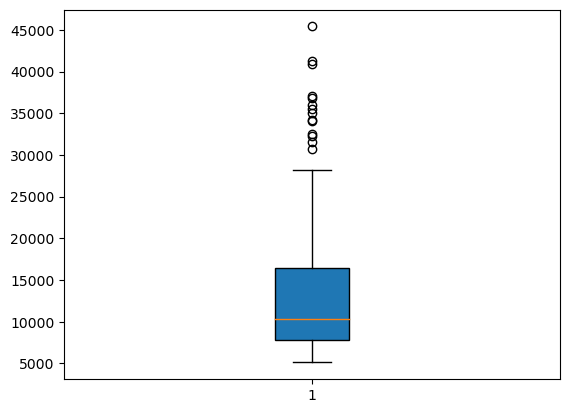

In [10]:
"""
bad az Hazf Data hay string :
"""
X = df["price"]
import matplotlib.pylab as plt
bild = plt.boxplot(X,patch_artist=True)

# 3. Preprocess the Data

# Data Cleaning:



In [ ]:
Handle missing values (imputation, removal, etc.).

In [12]:
df.isnull().sum()
df.isna()
df.isna(df["price"])
df.notna()
df["price"].notna()
df.dropna()
df.replace("NaN",np.mean)  
df.fillna("Value of filling")

df = df[df["price"].notnull()]

X = df.loc[:, (df.columns != "price")]

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [15]:
df2 = df[df["price"]>10000]

# Feature Engineering:

In [ ]:
##Ravesh hayee ba Hazf Column : 

#Way 1 : 
"""
ba be dast avardan darsad Data haye kahli dar har seton mitavan
ON Seton ha ra hazf kard .
"""
null_perc = df.isnull().sum()/len(df)*100 
columns_name = df.columns
new_columns_name = []
for i in range(0,len(null_perc)):
    if null_perc[i]<20:
        new_columns_name.append(columns_name[i])
        
#Way 2 :
"""Hazf Seton hayee k varianse Paeeni darand : """

Variances = df.var()
columns_name = df.columns # Column hayee k adadi hastand .
new_columns_name = []
for i in range(0,len(Variances)):
    if Variances[i] > 1:
        new_columns_name.append(columns_name[i])

        
# Way 3 : 
"""
ba Tavajoh be Cholegi Data 
Mitavan Data ro behtar kard 
Cholegi bala ==> Bad ast .

"""
skewness = df.skew()
columns_name = df.columns # Column hayee k adadi hastand .
new_columns_name = []
for i in range(0,len(skewness)):
    if skewness[i] < 0.5 or skewness[i] > -0.5:
        new_columns_name.append(columns_name[i])


#way 4 : 
"""
Bar asas Tizi 
tizi beyn -1,1 
"""

kurtosiss = df.kurtosis()
columns_name = df.columns # Column hayee k adadi hastand .
new_columns_name = []
for i in range(0,len(kurtosiss)):
    if kurtosiss[i] < 1 or kurtosiss[i] > -1:
        new_columns_name.append(columns_name[i])
        

## Ravesh hayee Bedon Hazf Column : 
#Kholase column ha : 

#Way PCA :

from sklearn.decomposition import PCA,KernelPCA
pca = PCA(n_components= 4 , kernel="rbf").fit(X) #Tedad column khaste shode , ravesh .
X = pca.transform(X)

kpca =KernelPCA(n_components= 4 , kernel="rbf").fit(X) #Tedad column khaste shode , ravesh .
X = pca.transform(X)

#way Factor analysis : 

"""
Dar in Ravesh ma Seton hayee k correlation balaee darand 
ra entekhab karde va on hara dar yek Daste gharar midahim 
va az Anha Miangin migirim """
from sklearn.decomposition import FactorAnalysis

fpa = FactorAnalysis(n_components=4).fit_transform(X)  #X.todenss()

#Way ICA , ISOMAP : 

"""Dar in ravesh ha m be donbal seton hayee 
ba Correlation paeen migardim 
ba ba Estefade az mokhtasat on ha ra be Bood Kamtar mibarad 
Va baray Dade haye gheyr Khati estefade mishavad ."""

from sklearn.decomposition import FastICA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE  ## pip stall UMAP-learn for better speed .

fica = FastICA(n_components= 4).fit(X)
Fica_resualt = fica.transform(X)


"""
Dar akhar ma mitavanim in chand ravesh ra ba ham Tarkib konim 
Ta natije Behtari b dat biavarim !

"""

In [ ]:
#Normalize :
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data)

#way 2 :
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

#way 3 : 
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
max_abs_scaled_data = scaler.fit_transform(data)

#way 4 : 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robust_scaled_data = scaler.fit_transform(data)

#way 5 : 
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l2')
l2_normalized_data = normalizer.fit_transform(data)

#way 6:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l1')
l1_normalized_data = normalizer.fit_transform(data)

#way 7 : 
import numpy as np
log_transformed_data = np.log1p(data)  # Use log1p to handle zero values

#way 8:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')  # or method='box-cox' for strictly positive data
power_transformed_data = pt.fit_transform(data)

#way 9:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
quantile_transformed_data = qt.fit_transform(data)

#way 10 :
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.5)
binary_data = binarizer.fit_transform(data)

#way 11:
from sklearn.preprocessing import normalize
unit_vector_data = normalize(data, norm='l2')

#wat 12:
import pandas as pd
# Min-Max Scaling
df['scaled'] = (df['column'] - df['column'].min()) / (df['column'].max() - df['column'].min())
# Z-Score Normalization
df['standardized'] = (df['column'] - df['column'].mean()) / df['column'].std()




In [ ]:
#. Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_labels = le.fit_transform(data['category_column'])

#One-Hot Encoding:
import pandas as pd
one_hot_encoded_data = pd.get_dummies(data, columns=['category_column'])

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
one_hot_encoded_data = ohe.fit_transform(data[['category_column']])

#Ordinal Encoding:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
ordinal_encoded_data = ordinal_encoder.fit_transform(data[['category_column']])

# Binary Encoding:
import category_encoders as ce

binary_encoder = ce.BinaryEncoder()
binary_encoded_data = binary_encoder.fit_transform(data['category_column'])

# Target Encoding (Mean Encoding):
import category_encoders as ce

target_encoder = ce.TargetEncoder()
target_encoded_data = target_encoder.fit_transform(data['category_column'], data['target'])

#Frequency Encoding:
frequency_encoded_data = data['category_column'].map(data['category_column'].value_counts())

#Hash Encoding (Feature Hashing):
import category_encoders as ce

hash_encoder = ce.HashingEncoder(n_components=8)  # n_components is the number of output columns
hash_encoded_data = hash_encoder.fit_transform(data['category_column'])


#Leave-One-Out Encoding:
import category_encoders as ce
loo_encoder = ce.LeaveOneOutEncoder()
loo_encoded_data = loo_encoder.fit_transform(data['category_column'], data['target'])

#Count Encoding:
count_encoded_data = data['category_column'].map(data['category_column'].value_counts())


#BaseN Encoding:
import category_encoders as ce

basen_encoder = ce.BaseNEncoder(base=3)  # Specify the base (e.g., 2, 3, 4)
basen_encoded_data = basen_encoder.fit_transform(data['category_column'])

# Polynomial Encoding:
import category_encoders as ce
polynomial_encoder = ce.PolynomialEncoder()
polynomial_encoded_data = polynomial_encoder.fit_transform(data['category_column'])


#Helmert Encoding:

import category_encoders as ce
helmert_encoder = ce.HelmertEncoder()
helmert_encoded_data = helmert_encoder.fit_transform(data['category_column'])

#Backward Difference Encoding:

import category_encoders as ce
backward_difference_encoder = ce.BackwardDifferenceEncoder()
backward_difference_encoded_data = backward_difference_encoder.fit_transform(data['category_column'])

# James-Stein Encoding;
import category_encoders as ce
js_encoder = ce.JamesSteinEncoder()
js_encoded_data = js_encoder.fit_transform(data['category_column'], data['target'])






# Feature Selection:


In [ ]:
#Variance Threshold
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
reduced_data = selector.fit_transform(data)


#Correlation Coefficient (Pearson, Spearman, Kendall):
import pandas as pd
correlation = data.corr(method='pearson')  # or 'spearman', 'kendall'

#Chi-Square Test:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
chi2_scores, p_values = chi2(scaled_data, target)

#Recursive Feature Elimination (RFE):
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(data, target)
selected_features = rfe.support_

#Implementation:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfecv = RFECV(estimator=model, step=1, cv=5)
rfecv.fit(data, target)
selected_features = rfecv.support_

#3 Embedded Methods:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.01)
model.fit(data, target)
selected_features = model.coef_ != 0


## 
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(data, target)
importance = model.coef_

# 

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(data, target)
selected_features = model.coef_ != 0

#

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(data, target)
importance = model.feature_importances_


# 4. Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain1, X_temp, Ytrain1, y_temp = train_test_split(X1, Y1, test_size=0.3, random_state=42)
X_val, Xtest1, y_val, Ytest1 = train_test_split(X_temp, y_temp, test_size=0.8, random_state=42)



# 5. Choose and Implement a Model


# Regressions:

In [ ]:
model4 = LinearRegression().fit(Xtrain1,Ytrain1)

In [ ]:
#GBR
from sklearn.ensemble import GradientBoostingRegressor
model4 = GradientBoostingRegressor(random_state=0).fit(Xtrain1,Ytrain1)

#Polynomial Regression : 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create polynomial features
poly = PolynomialFeatures(degree=2)
model4 = make_pipeline(poly, LinearRegression()).fit(Xtrain1, Ytrain1)


##Ridge Regression : 
from sklearn.linear_model import Ridge
model4 = Ridge(alpha=1.0).fit(Xtrain1, Ytrain1)

#Lasso : 
from sklearn.linear_model import Lasso
model4 = Lasso(alpha=0.1).fit(Xtrain1, Ytrain1)

#Elastic Net Regression : 
from sklearn.linear_model import ElasticNet
model4 = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(Xtrain1, Ytrain1)

#Support Vector Regression : 

from sklearn.svm import SVR
model4 = SVR(kernel='linear').fit(Xtrain1, Ytrain1)

#Decision Tree Regression : 
from sklearn.tree import DecisionTreeRegressor
model4 = DecisionTreeRegressor(random_state=2).fit(Xtrain1, Ytrain1)

#Random FOrrst Regression : 
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(n_estimators=300).fit(Xtrain1, Ytrain1)

#XGBOOst : 
import xgboost as xgb
model4 = xgb.XGBRegressor().fit(Xtrain1,Ytrain1)


#LightGBM 
import lightgbm as lgb
model4 = lgb.LGBMRegressor(force_col_wise=True).fit(Xtrain1, Ytrain1)

#CatBoost:
from catboost import CatBoostRegressor
model4 = CatBoostRegressor(learning_rate=0.1, depth=6, iterations=80).fit(Xtrain1, Ytrain1)

#FeedFOrwardNeuralNetwork : 
from sklearn.neural_network import MLPRegressor
model4 = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500,random_state=1).fit(Xtrain1, Ytrain1)



# Classification:

In [ ]:
#Logistic Regression;
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

#k-Nearest Neighbors (k-NN):
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)


# Support Vector Machines (SVM);
from sklearn.svm import SVC
model = SVC(kernel='linear')  # or kernel='rbf' for non-linear
model.fit(X_train, y_train)

#Naive Bayes:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

#Decision Trees:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#Random Forest:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

#Gradient Boosting Machines (GBM):
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)


#XGBoost (Extreme Gradient Boosting:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

# LightGBM (Light Gradient Boosting Machine):
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)


#CatBoost:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X_train, y_train)

#AdaBoost (Adaptive Boosting):
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)

#Artificial Neural Networks (ANN):

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=10)


#Convolutional Neural Networks (CNN)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)


# Recurrent Neural Networks (RNN):
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(50, input_shape=(timesteps, features)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

#Long Short-Term Memory Networks (LSTM);
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, input_shape=(timesteps, features)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)


#Gradient Boosted Decision Trees (GBDT);
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)


#Extra Trees (Extremely Randomized Trees)
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_train, y_train)

#Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

#Quadratic Discriminant Analysis (QDA):
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

# Multi-Layer Perceptron (MLP);
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,))
model.fit(X_train, y_train)


#. Voting Classifier;
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

model1 = LogisticRegression()
model2 = SVC(probability=True)
model3 = RandomForestClassifier()

model = VotingClassifier(estimators=[('lr', model1), ('svc', model2), ('rf', model3)], voting='soft')
model.fit(X_train, y_train)










In [ ]:
model4.fit(Xtrain,Ytreain)

# 6. Evaluate the Model

In [ ]:
Y_pred = model4.predict(Xtest)

In [ ]:
##Regressions :
print(model4.score(Xtrain1,Ytrain1))
print(model4.score(Xtest1,ypred4))
print(met.mean_absolute_error(Ytest1,ypred4))
print(met.mean_squared_error(ypred4, Ytest1))
print(r2_score(ypred4,Ytest1))

#Classification : 
from  sklearn.model_selection   import  cross_val_score
from  sklearn.metrics   import  classification_report
print(classification_report(ytest, ypLR , target_names=['CLASS2', 'CLASS1'] ))
np.mean(cross_val_score(model4 , X , y , cv=10))  
model4.score(Xtest , ytest)
confusion_matrix(ytest, ypLR)
tn, fp, fn, tp = confusion_matrix(ytest, ypLR).ravel()



# 7. Tune the Model

In [ ]:
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(model_name , param_grid={
    """Dar in Dictionery ma moteghayr hayee k mikhahim 
    dar model taghir konnand ra mineveisim 
    
    scoring= be donbal behtarin melak hastim . 
    cv = taghsim data ba n teadad . 
    n_jobs = tedad CPU 
    verbose = Tozih kar kard Data 
    
    """
})

gsc.fir(X,Y)

In [ ]:
#Stacking :
""" Estefade az chand ravesh baray Featur Selections va ... """

# 8. Interpret the Model

In [ ]:
from  sklearn.metrics  import  roc_curve, auc
from  sklearn.model_selection   import  StratifiedKFold
from  scipy  import  interp

cv = StratifiedKFold(n_splits = 6)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

for train, test in cv.split(X, y):
    cf = LR.fit(Xtrain, ytrain)
    probas_ = cf.predict_proba(Xtest)
    fpr, tpr, thresholds = roc_curve(ytest, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i += 1    
    
            
mean_tpr      = np.mean(tprs, axis=0)
mean_tpr[-1]  = 1.0
mean_auc      = auc(mean_fpr, mean_tpr)
std_auc       = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='cyan',label=r'MLP' ,lw=2, alpha=.8)
std_tpr    = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Mean ROC')
plt.legend(loc="lower right");

plt.savefig('D:/roc.png')

# 9. Deploy the Model

# 10. Document and Communicate

# 11. Iterate and Improve